<a href="https://colab.research.google.com/github/ganesh1729m/Machine-Learning-Works/blob/main/Task_1___Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting contents from Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##01.Data Filtering:
Extract the entries corresponding to your home state from the dataset. Ensure you accurately filter out only those pincodes that belong to your home state.
1. Load the dataset
2. Filter the data for the state of Telangana
3. Remove duplicate pincodes
4. Remove NaN values from ['Latitude', 'Longitude']
4. Saving the data (Optional)

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/datasets/clustering_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Filter the data for the state of Telangana
telangana_data = data[data['StateName'].str.upper() == 'TELANGANA']

# Remove duplicate pincodes
telangana_data = telangana_data.drop_duplicates(subset=['Pincode'])

# Drop rows with NaN values in 'Latitude' or 'Longitude' columns
telangana_data = telangana_data.dropna(subset=['Latitude', 'Longitude'])

# Extract the longitudes and latitudes
longitudes_latitudes = telangana_data[['StateName','Pincode', 'Longitude', 'Latitude']]

# Create a subfolder for output (if it doesn't exist)
!mkdir -p '/content/drive/MyDrive/data_30_6/output'

output_path = '/content/drive/MyDrive/data_30_6/telangana_pincodes.csv'
longitudes_latitudes.to_csv(output_path, index=False)

# Display the first few rows of the result
print(longitudes_latitudes.head())



<ipython-input-24-013cfdff0da4>:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


     StateName  Pincode   Longitude    Latitude
138  TELANGANA   503186  78.0773742  18.6845544
139  TELANGANA   503180   77.618717  18.5329923
141  TELANGANA   503187  77.9466324  18.3096558
142  TELANGANA   503101  78.4853495  18.2108201
143  TELANGANA   503125   78.549741  18.2127127


##02.Data Visualization:
You can utilize the longitude and latitude data to plot the geographical locations of these pincodes on a map (get creative!). This will help in visualizing the distribution of the pincodes across your state.
1. Imports the `folium` library for creating interactive maps.
2. Creates a map centered on Telangana with a starting zoom level of 7.
3. Iterates through the DataFrame, adding markers to the map at each latitude and longitude. Each marker shows the pincode when clicked.
4. Renders the interactive map with the added markers.

In [ ]:
import folium

telangana_map = folium.Map(location=[17.385044, 78.486671], zoom_start=7)


for idx, row in longitudes_latitudes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Pincode: {row['Pincode']}",
    ).add_to(telangana_map)

telangana_map


Most of the data markers are in my State. Afew were in the country may be due to incorrect data or non- matching.

##03.Clustering Analysis:
Implement the k-means clustering algorithm from scratch (do not use any pre-built k-means function).
Apply this algorithm to the longitude and latitude data of your filtered pincodes to identify distinct clusters within your state.


In [ ]:
import numpy as np

coordinates = telangana_data[['Longitude', 'Latitude']].values.astype(np.float64)

def initialize_centroids(points, k):
    indices = np.random.choice(points.shape[0], k, replace=False)
    return points[indices]

def assign_clusters(points, centroids):
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(points, labels, k):
    new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(points, k, max_iterations=100):
    centroids = initialize_centroids(points, k)
    for _ in range(max_iterations):
        labels = assign_clusters(points, centroids)
        new_centroids = update_centroids(points, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

k = 30  # Number of clusters
labels, centroids = kmeans(coordinates, k)


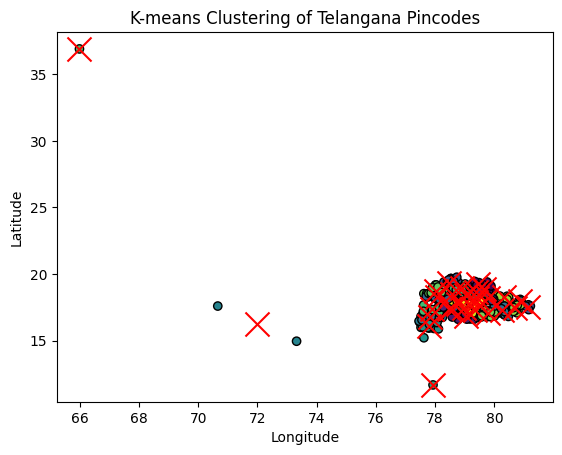

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Telangana Pincodes')
plt.show()


##05.Visualization and Preprocessing:
Use appropriate visualization techniques (like scatter plots, maps, etc.) to illustrate the clusters and any other relevant observations.
Ensure your data is preprocessed correctly before applying the k-means algorithm (this may include handling missing values,checking for duplicates etc.).


In [ ]:
import colorsys
colors = [colorsys.hsv_to_rgb(i / k, 1.0, 1.0) for i in range(k)]
colors = ['#%02x%02x%02x' % (int(r * 255), int(g * 255), int(b * 255)) for r, g, b in colors]

telangana_map = folium.Map(location=[17.385044, 78.486671], zoom_start=7)

# Handle potential NaN values in coordinates and labels
valid_indices = ~np.isnan(coordinates).any(axis=1)
coordinates = coordinates[valid_indices]
labels = labels[valid_indices]

for i in range(k):
    cluster_points = coordinates[labels == i]
    for point in cluster_points:
        folium.CircleMarker(
            location=[point[1], point[0]],  # Latitude, Longitude order
            radius=5,
            color=colors[i],
            fill=True,
            fill_color=colors[i]
        ).add_to(telangana_map)

for i, centroid in enumerate(centroids):
    folium.Marker(
        location=[centroid[1], centroid[0]],  # Latitude, Longitude order
        popup=f'Centroid {i+1}',
        icon=folium.Icon(color=colors[i])
    ).add_to(telangana_map)

# telangana_map.save('/content/drive/MyDrive/datasets/telangana_clusters_map.html')
telangana_map

<ipython-input-39-33d451c14580>:27: UserWarning: color argument of Icon should be one of: {'darkred', 'gray', 'darkblue', 'darkgreen', 'purple', 'darkpurple', 'cadetblue', 'black', 'lightgray', 'orange', 'lightred', 'white', 'green', 'lightblue', 'red', 'pink', 'lightgreen', 'blue', 'beige'}.
  icon=folium.Icon(color=colors[i])


##Inferences

* The high concentration of pincodes suggests a densely populated area with
significant economic activities. ( Hyderabad)

* A sparse cluster indicating rural areas in the northern part of Telangana. These areas might benefit from agricultural development programs and rural healthcare services.

* Use these insights to inform policy decisions, resource allocation, and development projects across Telangana.

* Surrounding Hyderabad, this cluster may include suburban regions with growing populations. Development efforts here can focus on improving transportation and housing.

* There are some areas where are no Pincodes, which can be improved.